
## Machine Learning with Sklearn Pipeline         





## Sections 

 - <a href='#section 1'>1. Data and information (**BigMart_train.csv**)</a><br>
 - <a href="#section 2">2. Fill null values => section disabled</a><br>     
 - <a href="#section 3">3. Define independent & dependent variables + train test split</a><br>   
 - <a href="#section 4">4. Preprocessing pipeline for numerical features</a><br>
 - <a href="#section 5">5. Preprocessing pipeline for categorical features</a><br>       
 - <a href="#section 6">6. Combine preprocess pipelines</a><br>   
 - <a href="#section 7">7. Pipelines for base models</a><br>    
 - <a href="#section 8">8. Cross validation via grid search</a><br>   
 - <a href="#section 9">9. Display grid search results</a><br>
 - <a href="#section 10">10. Cross validation via random search</a><br>
 - <a href="#section 11">11. Display random search results</a><br>       
 - <a href="#section 12">12. pickle files</a><br>   




In [ ]:

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from scipy.stats import uniform, randint 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import OneHotEncoder  
from sklearn.compose import ColumnTransformer  
from sklearn.impute import SimpleImputer  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import KFold   
from sklearn.model_selection import GridSearchCV   
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.model_selection import cross_val_score  

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet  
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from xgboost import XGBRegressor 
from sklearn.metrics import mean_squared_error, r2_score  # scoring = 'neg_root_mean_squared_error', 'r2' 
import time   
import warnings   
import pickle   

%matplotlib inline 
pd.set_option('display.max_column', 50)   
pd.set_option('display.max_rows', 9000)   
warnings.filterwarnings('ignore')   


<p><a name="section 1"></a></p> 

### Section 1: Data and Information      

In [ ]:

df = pd.read_csv('BigMart_train.csv')  
#df = pd.read_csv('BigMart_test.csv')
df.sample(5)  


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7422,FDA50,16.25,Low Fat,0.087103,Dairy,96.0410,OUT013,1987,High,Tier 3,Supermarket Type1,868.8690
6039,FDE35,NaN,Regular,0.000000,Starchy Foods,59.8904,OUT027,1985,Medium,Tier 3,Supermarket Type3,1757.7120
4877,NCS29,9.00,Low Fat,0.069654,Health and Hygiene,266.2884,OUT049,1999,Medium,Tier 1,Supermarket Type1,2914.8724
5559,FDG53,10.00,Low Fat,0.045848,Frozen Foods,138.5180,OUT035,2004,Small,Tier 2,Supermarket Type1,2237.0880
7648,FDY50,5.80,Low Fat,0.131221,Dairy,87.8172,OUT045,2002,NaN,Tier 2,Supermarket Type1,1070.6064


In [ ]:
''' drop the "Item_Identifier" feature column => It is an unique identifer, does not play a part in ML '''

df = df.drop(['Item_Identifier'], axis = 1)   


In [ ]:

df.shape 


(8523, 11)

In [ ]:

df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [ ]:

df.isnull().sum() 


Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
''' null values => relative figures '''

(df.isnull().sum() / len(df)) * 100    


Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:

for col in df.columns:  
    print('-' * 20, col, '-' * 20)  
    print(df[col].value_counts(dropna = False, ascending = False).head(5), '\n')     



-------------------- Item_Weight --------------------
NaN      1463
12.15      86
17.60      82
13.65      77
11.80      76
Name: Item_Weight, dtype: int64 

-------------------- Item_Fat_Content --------------------
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

-------------------- Item_Visibility --------------------
0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
Name: Item_Visibility, dtype: int64 

-------------------- Item_Type --------------------
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Name: Item_Type, dtype: int64 

-------------------- Item_MRP --------------------
172.0422    7
188.1872    6
170.5422    6
109.5228    6
196.5084    6
Name: Item_MRP, dtype: int64 

-------------------- Outlet_Identifier --------------------
OUT027    935
OUT013    932
OUT049    930


In [ ]:
''' can be seen that there are only 2 values in the "Item_Fat_Content" feature category '''

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                         'low fat': 'Low Fat',   
                                                         'reg': 'Regular'})  
                                                                     


In [ ]:
''' there may be a lot of values in the "Item_Type" categorical feature => sparse matrix in one hot encoding '''

df['Item_Type'].unique() 

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
''' correlation table '''  

corr = round(df.corr(), 3)   
corr 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000,-0.014,0.027,-0.012,0.014
Item_Visibility,-0.014,1.000,-0.001,-0.075,-0.129
Item_MRP,0.027,-0.001,1.000,0.005,0.568
Outlet_Establishment_Year,-0.012,-0.075,0.005,1.000,-0.049
Item_Outlet_Sales,0.014,-0.129,0.568,-0.049,1.000


In [ ]:
''' correlation to the target feature (Item_Outlet_Sales)  '''     

corr['Item_Outlet_Sales'].sort_values(ascending = False)       


Item_Outlet_Sales            1.000
Item_MRP                     0.568
Item_Weight                  0.014
Outlet_Establishment_Year   -0.049
Item_Visibility             -0.129
Name: Item_Outlet_Sales, dtype: float64

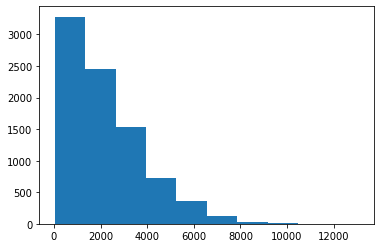

In [ ]:

plt.hist(x = df['Item_Outlet_Sales'])  
plt.show() 



<p><a name="section 2"></a></p> 

### Section 2: Fill null values  => section disabled in favor of the pipeline operations below    


In [ ]:
''' fill null values '''

## impute numerical 
#df['Item_Weight'] = df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())     

## impute categorical 
#df['Outlet_Size'] = df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])  



' fill null values '

In [ ]:
''' check for null values '''

#df.isnull().sum()  

' check for null values '

In [ ]:
''' for the sake of redundency => already in the df_train.info() ''' 

df.dtypes


Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


There are a number of ways in which we can convert these categories into numerical values. You can read about the same in this article – Simple Methods to deal with Categorical Variables. We are going to use the categorical_encoders library in order to convert the variables into binary columns.

Note that in this example I am not going to encode Item_Identifier since it will increase the number of feature to 1500. This feature can be used in other ways (read here), but to keep the model simple, I will not use this feature here.


<p><a name="section 3"></a></p> 

### Section 3: Train test split           

- Note that the 'Item_Identifier' feature column was dropped and the 'Item_Fat_Content' feature column was modified  
- Currently df.shape = (8523, 10)      


In [ ]:
''' the current state of the data frame '''

#df.sample(5)   


' the current state of the data frame '

In [ ]:
''' define independent and dependent variables + train test split '''    

x = df.iloc[:, 0:10]  
y = df.iloc[:, 10]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)     


<p><a name="section 4"></a></p> 

### Section 4: Preprocessing pipeline for numerical features    


In [ ]:
''' preprocessing pipeline for numerical features '''    

from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler 

# leave out the 'Item_Outlet_Sales' column as it is the target 
numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']  


numeric_transformer = Pipeline([('imputer', SimpleImputer(strategy = 'mean')),   
                                ('scaler', StandardScaler())])    

# see what it looks like 
numeric_transformer 


Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

<p><a name="section 5"></a></p> 

### Section 5: Preprocessing pipeline for categorical features      


In [ ]:
''' preprocessing pipeline for categorical features '''    

from sklearn.preprocessing import OneHotEncoder  

categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',    
                        'Outlet_Location_Type', 'Outlet_Type'  ]   


categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy = 'most_frequent')),  
                                    ('onehot', OneHotEncoder(sparse = False, handle_unknown = 'ignore') )  ])



# see what it looks like 
categorical_transformer   



Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='most_frequent',
                               verbose=0)),
                ('onehot',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=False))],
         verbose=False)

<p><a name="section 6"></a></p> 

### Section 6: Combine the numerical and categorical preprocessing pipelines              



In [ ]:
''' combine the numerical and categorical preprocessors into one '''  

from sklearn.compose import ColumnTransformer  

preprocessor = ColumnTransformer(transformers = [('num', numeric_transformer, numeric_features), 
                                                 ('cat', categorical_transformer, categorical_features)])   
    

## what the combined processor looks like 
preprocessor 



ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0)),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                             

<p><a name="section 7"></a></p> 

### Section 7: Pipelines for base models                


In [ ]:
''' define model pipelines '''

## model pipelines     
pipelines = [('Linear', Pipeline([('preprocessor', preprocessor), ('linear', LinearRegression())])), 
             ('Ridge', Pipeline([('preprocessor', preprocessor), ('ridge', Ridge())])),   
             ('Lasso', Pipeline([('preprocessor', preprocessor), ('lasso', Lasso())])),   
             ('ElasticNet', Pipeline([('preprocessor', preprocessor), ('elastic', Lasso())])  ), 
             ('DecisionTree', Pipeline([('preprocessor', preprocessor), ('dtree', DecisionTreeRegressor())])  ), 
             ('KNN', Pipeline([('preprocessor', preprocessor), ('knn', KNeighborsRegressor())])  ),  
             ('SVR', Pipeline([('preprocessor', preprocessor), ('svr', SVR())])    ), 
             ('RandomForest', Pipeline([('preprocessor', preprocessor), ('rf', RandomForestRegressor())])  ), 
             #('GradientBoosting', Pipeline([('preprocessor', preprocessor), ('gbr', GradientBoostingRegressor())]) ),  
             ('XGBoostRegressor', Pipeline([('preprocessor', preprocessor), ('xgb', XGBRegressor()) ]))
            ]  


In [ ]:
''' generate CV results => RMSE '''    

results = []  
names = []    


# loop to calculate RMSE     
print('Model and mean RMSE','\n')  
print(f'Reference: mean of the target: {np.mean(y_train):.5f}', '\n')
for name, model in pipelines:  
    kfold = KFold(n_splits = 10, shuffle = True, random_state = 0)  
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'neg_root_mean_squared_error')  #scoring = RMSE    
    results.append(cv_results) 
    names.append(name)   
    print(f'Model: {name}  ||  mean: {cv_results.mean():.5f}  ||  stdev: {cv_results.std():.5f}')       

print()  



Model and mean RMSE 

Reference: mean of the target: 2188.13520 

Model: Linear  ||  mean: -1131.14588  ||  stdev: 50.07481
Model: Ridge  ||  mean: -1131.19258  ||  stdev: 50.04973
Model: Lasso  ||  mean: -1130.40368  ||  stdev: 50.08972
Model: ElasticNet  ||  mean: -1130.40368  ||  stdev: 50.08972
Model: DecisionTree  ||  mean: -1514.42347  ||  stdev: 61.82401
Model: KNN  ||  mean: -1206.36855  ||  stdev: 56.61819
Model: SVR  ||  mean: -1668.35420  ||  stdev: 85.55062
Model: RandomForest  ||  mean: -1141.44500  ||  stdev: 64.07460
[19:48:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:48:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:48:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:48:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror

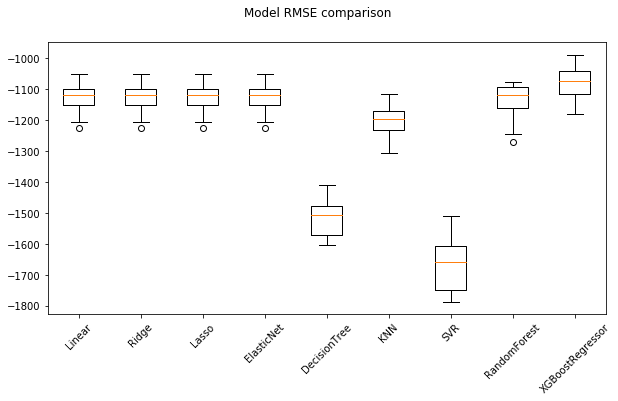

In [ ]:
''' Plot RMSE results '''

fig = plt.figure(figsize = (10,5))  
fig.suptitle('Model RMSE comparison')   
ax = fig.add_subplot(111)   
plt.boxplot(results)  
ax.set_xticklabels(names, rotation = 45)  
#ax.grid() 
plt.show()    


In [ ]:
''' generate CV results => r^2 '''  

results = []  
names = []     

# loop to calculate r^2  
print('Model and mean r^2','\n')
for name, model in pipelines:  
    kfold = KFold(n_splits = 10, shuffle = True, random_state = 0)  
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'r2')  #scoring = RMSE    
    results.append(cv_results) 
    names.append(name) 
    print(f'Model: {name}  ||  mean: {cv_results.mean():.5f}  ||  stdev: {cv_results.std():.5f}')       

print() 


Model and mean r^2 

Model: Linear  ||  mean: 0.56006  ||  stdev: 0.02267
Model: Ridge  ||  mean: 0.56003  ||  stdev: 0.02264
Model: Lasso  ||  mean: 0.56064  ||  stdev: 0.02266
Model: ElasticNet  ||  mean: 0.56064  ||  stdev: 0.02266
Model: DecisionTree  ||  mean: 0.21439  ||  stdev: 0.05865
Model: KNN  ||  mean: 0.49918  ||  stdev: 0.03461
Model: SVR  ||  mean: 0.04476  ||  stdev: 0.01937
Model: RandomForest  ||  mean: 0.55167  ||  stdev: 0.04030
[19:49:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecat

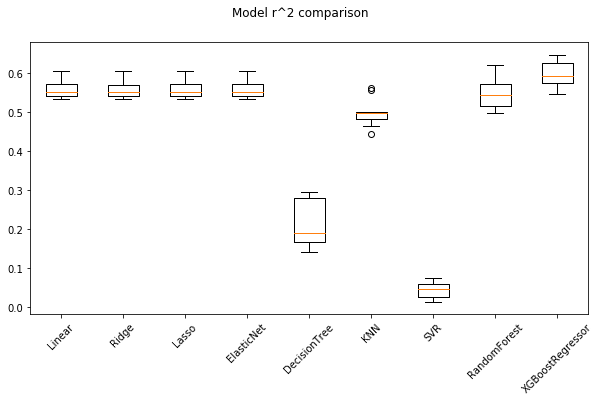

In [ ]:
''' Plot r^2 results '''

fig = plt.figure(figsize = (10,5))  
fig.suptitle('Model r^2 comparison')   
ax = fig.add_subplot(111)   
plt.boxplot(results)  
ax.set_xticklabels(names, rotation = 45)  
#ax.grid() 
plt.show()     


<p><a name="section 8"></a></p> 

### Section 8: Cross validation via grid search                 


In [ ]:
''' define empty lists to contain results '''

model = []  
best_score = []  


In [ ]:
''' Linear regression => includes extraneous steps for consistency with other models '''  

start_time = time.time()  

# linear regression pipeline 
linear_pipe = Pipeline([('preprocessor', preprocessor), ('linear', LinearRegression())])     

# linear regression parameters for grid search 
linear_params = { }        

# linear grid search  
kfold = KFold(n_splits = 5, shuffle = True)  
linear_grid = GridSearchCV(linear_pipe, param_grid = linear_params, cv = kfold)  
linear_grid.fit(x_train, y_train)   

# # append values to lists 
model.append('Linear')  
best_score.append(linear_grid.best_score_)     

# print results 
print(f'The best score: {linear_grid.best_score_}', '\n')  
print(f'The best parameters: {linear_grid.best_params_}', '\n')
run_time = round((time.time() - start_time)/60, 5)  
print(f'Run time: {run_time} minutes')




The best score: 0.5601709174139983 

The best parameters: {} 

Run time: 0.00998 minutes


In [ ]:
''' Ridge '''

start_time = time.time() 

# ridge pipeline 
ridge_pipe = Pipeline([('preprocessor', preprocessor), ('ridge', Ridge())])     

# ridge parameters for grid search 
ridge_params = {'ridge__alpha': [1e-4, 1e-2, 0.1, 1.0, 2.0, 10, 50, 100]  }    

# ridge grid search 
kfold = KFold(n_splits = 5, shuffle = True)  
ridge_grid = GridSearchCV(ridge_pipe, param_grid = ridge_params, cv = kfold)      
ridge_grid.fit(x_train, y_train)   

# append values to lists 
model.append('Ridge')  
best_score.append(ridge_grid.best_score_) 

# print results 
print(f'The best score: {ridge_grid.best_score_}', '\n')  
print(f'The best parameters: {ridge_grid.best_params_}', '\n')
run_time = round((time.time() - start_time)/60, 5)  
print(f'Run time: {run_time} minutes')       




The best score: 0.5604485507442294 

The best parameters: {'ridge__alpha': 50} 

Run time: 0.07452 minutes


In [ ]:
''' Lasso '''

start_time = time.time()   

# lasso pipeline 
lasso_pipe = Pipeline([('preprocessor', preprocessor), ('lasso', Lasso())])      
              
# lasso parameters for grid search   
lasso_params = {'lasso__alpha': [1e-4, 1e-2, 0.1, 1.0, 2.0, 10, 50, 100]  }   

# lasso grid search  
kfold = KFold(n_splits = 5, shuffle = True)  
lasso_grid = GridSearchCV(lasso_pipe, param_grid = lasso_params, cv = kfold)     
lasso_grid.fit(x_train, y_train)   

# append values to lists 
model.append('Lasso')  
best_score.append(lasso_grid.best_score_)   

# print results 
print(f'The best score: {lasso_grid.best_score_}', '\n')  
print(f'The best parameters: {lasso_grid.best_params_}', '\n')
run_time = round((time.time() - start_time)/60, 5)  
print(f'Run time: {run_time} minutes')




The best score: 0.5597477240400158 

The best parameters: {'lasso__alpha': 2.0} 

Run time: 0.13758 minutes


In [ ]:
''' Elastic net '''    

start_time = time.time()  

# elastic net pipeline 
elastic_pipe = Pipeline([('preprocessor', preprocessor), ('elastic', ElasticNet())])      
              
# elastic net parameters for grid search   
elastic_params = {'elastic__alpha': [1e-4, 1e-2, 0.1, 1.0, 2.0, 10, 50, 100], 
                  'elastic__l1_ratio': [0.25, 0.5, 0.75, 0.99],
                  'elastic__max_iter': [1000, 1500, 2000, 2500]  }     

# elastic net grid search   
kfold = KFold(n_splits = 5, shuffle = True)  
elastic_grid = GridSearchCV(elastic_pipe, param_grid = elastic_params, cv = kfold)    
elastic_grid.fit(x_train, y_train)   

# append values to lists 
model.append('ElasticNet')  
best_score.append(elastic_grid.best_score_) 

# print results 
print(f'The best score: {elastic_grid.best_score_}', '\n')  
print(f'The best parameters: {elastic_grid.best_params_}', '\n')
run_time = round((time.time() - start_time)/60, 5)  
print(f'Run time: {run_time} minutes')




The best score: 0.5608414169588818 

The best parameters: {'elastic__alpha': 1.0, 'elastic__l1_ratio': 0.99, 'elastic__max_iter': 1000} 

Run time: 1.855 minutes


In [ ]:
''' Decision tree regressor '''   

start_time = time.time()  

# decision tree pipeline 
decision_pipe = Pipeline([('preprocessor', preprocessor), ('decision', DecisionTreeRegressor())])  

# decision tree parameters for grid search 
decision_params = {#'decision__criterion': ['gini', 'entropy'],  
                   'decision__criterion': ['mse'],
                   'decision__min_samples_leaf': range(1, 10), 
                   'decision__min_samples_split': np.linspace(2, 30, 15, dtype = int) }  

# decision tree grid search   
kfold = KFold(n_splits = 5, shuffle = True) 
decision_grid = GridSearchCV(decision_pipe, param_grid = decision_params, cv = kfold)     
decision_grid.fit(x_train, y_train)   

# append values to lists 
model.append('DecisionTree')  
best_score.append(decision_grid.best_score_)  

# print results 
print(f'The best score: {decision_grid.best_score_}', '\n')  
print(f'The best parameters: {decision_grid.best_params_}', '\n')
run_time = round((time.time() - start_time)/60, 5)  
print(f'Run time: {run_time} minutes')





The best score: 0.5222002986766576 

The best parameters: {'decision__criterion': 'mse', 'decision__min_samples_leaf': 9, 'decision__min_samples_split': 30} 

Run time: 1.11868 minutes


In [ ]:
''' KNN regressor '''    

start_time = time.time()  

# KNeighbors pipeline 
knn_pipe = Pipeline([('preprocessor', preprocessor), ('knn', KNeighborsRegressor())])  

# decision tree parameters for grid search 
knn_params = {'knn__n_neighbors': range(1, 10),  
              'knn__algorithm': ['brute', 'auto'],   
              'knn__p': [1, 2] }  

# decision tree grid search   
kfold = KFold(n_splits = 5, shuffle = True) 
knn_grid = GridSearchCV(knn_pipe, param_grid = knn_params, cv = kfold)    
knn_grid.fit(x_train, y_train)   

# append values to lists 
model.append('KNN')  
best_score.append(knn_grid.best_score_)  

# print results 
print(f'The best score: {knn_grid.best_score_}', '\n')  
print(f'The best parameters: {knn_grid.best_params_}', '\n')
run_time = round((time.time() - start_time)/60, 5)  
print(f'Run time: {run_time} minutes')



The best score: 0.5345261949068542 

The best parameters: {'knn__algorithm': 'brute', 'knn__n_neighbors': 9, 'knn__p': 2} 

Run time: 0.83254 minutes


In [ ]:
''' SVR '''     

start_time = time.time()  

# svr pipeline 
svr_pipe = Pipeline([('preprocessor', preprocessor), ('svr', SVR())])   

# svr parameters for grid search 
svr_params = {'svr__kernel': ['rbf'], #['linear', 'poly', 'rbf'],  # default = rbf
              #'svr__C': np.linspace(0.1, 1, 10),  
              'svr__C': [0.1, 1, 5],# [0.1, 1, 3, 5, 6, 7, 10],  # default = 1.0
              'svr__gamma': ['scale']} #np.linspace(1e-3, 1, 10) }  # default = scale

# svr grid search 
kfold = KFold(n_splits = 5, shuffle = True) 
svr_grid = GridSearchCV(svr_pipe, param_grid = svr_params, cv = kfold)    
svr_grid.fit(x_train, y_train)   

# append values to lists 
model.append('SVR')  
best_score.append(svr_grid.best_score_)  

# print results 
print(f'The best score: {svr_grid.best_score_}', '\n')  
print(f'The best parameters: {svr_grid.best_params_}', '\n')
run_time = round((time.time() - start_time)/60, 5)  
print(f'Run time: {run_time} minutes')



The best score: 0.2638574811628877 

The best parameters: {'svr__C': 5, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'} 

Run time: 0.70149 minutes


In [ ]:
''' Random Forest Regressor '''     

start_time = time.time()  

# random forest pipeline 
randomf_pipe = Pipeline([('preprocessor', preprocessor), ('randomf', RandomForestRegressor())])   

# random forest grid search 
randomf_params = {'randomf__n_estimators': [50, 100],   #[25, 50, 100, 150, 200]  
                 #'randomf__criterion': ['gini', 'entropy'], 
                 'randomf__max_depth': [5, 10, 20],  
                 'randomf__min_samples_leaf': range(1, 10), 
                 'randomf__min_samples_split': np.linspace(start = 2, stop = 10, num = 5, dtype = int)  }

# svr grid search 
kfold = KFold(n_splits = 5, shuffle = True) 
randomf_grid = GridSearchCV(randomf_pipe, param_grid = randomf_params, cv = kfold)      
randomf_grid.fit(x_train, y_train)   

# append values to lists 
model.append('RandomForest')  
best_score.append(randomf_grid.best_score_)  

# print results 
print(f'The best score: {randomf_grid.best_score_}', '\n')  
print(f'The best parameters: {randomf_grid.best_params_}', '\n')
run_time = round((time.time() - start_time)/60, 5)  
print(f'Run time: {run_time} minutes')



The best score: 0.5968160097403603 

The best parameters: {'randomf__max_depth': 5, 'randomf__min_samples_leaf': 8, 'randomf__min_samples_split': 10, 'randomf__n_estimators': 50} 

Run time: 28.18215 minutes


In [ ]:
''' Gradient Boosting Regressor '''    

# start_time = time.time()  

# # gradient boosting regressor pipeline 
# gbr_pipe = Pipeline([('preprocessor', preprocessor), ('gbr', GradientBoostingRegressor())])   

# # gbr parameters for grid search 
# gbr_params = {'gbr__n_estimators': [100, 200, 300], # default = 100; # unlike tree models, this is how many iteration rounds you'd like to run (default = 100) 
#               'bgr__learning_rate': [0.01, 0.1, 0.5], # default = 0.1 
#               'gbr__subsample': [0.5, 0.75, 1.0],  # 
#               'gbr__max_depth': [3, 10, 20] }  # default = 3  

# # svr grid search 
# kfold = KFold(n_splits = 5, shuffle = True) 
# gbr_grid = GridSearchCV(gbr_pipe, param_grid = gbr_params, cv = kfold)     
# gbr_grid.fit(x_train, y_train)   

# # append values to lists 
# model.append('GradientBoosting')  
# best_score.append(gbr_grid.best_score_)  

# # print results 
# print(f'The best score: {gbr_grid.best_score_}', '\n')  
# print(f'The best parameters: {gbr_grid.best_params_}', '\n')
# run_time = round((time.time() - start_time)/60, 5)  
# print(f'Run time: {run_time} minutes')



' Gradient Boosting Regressor '

In [ ]:
''' XGBoost Regressor '''    

start_time = time.time()  

# gradient boosting regressor pipeline 
xgb_pipe = Pipeline([('preprocessor', preprocessor), ('xgb', GradientBoostingRegressor())])   

# xgb parameters for grid search 
xgb_params = {'xgb__n_estimators': [100, 200, 300], #np.linspace(100, 1100, 10),  # default = 100
              'xgb__learning_rate': [0.01, 0.1, 0.5], # default = 0.1 
              'xgb__subsample': [0.5, 0.75, 1.0],  # default = 1.0   
              'xgb__max_depth': [3, 10, 20]} # [3, 10, 15, 20]  # default = 3

# xgb grid search 
kfold = KFold(n_splits = 5, shuffle = True) 
xgb_grid = GridSearchCV(xgb_pipe, param_grid = xgb_params, cv = kfold)     
xgb_grid.fit(x_train, y_train)   

# append values to lists 
model.append('XGBoostRegressor')  
best_score.append(xgb_grid.best_score_)  

# print results 
print(f'The best score: {xgb_grid.best_score_}', '\n')  
print(f'The best parameters: {xgb_grid.best_params_}', '\n')
run_time = round((time.time() - start_time)/60, 5)  
print(f'Run time: {run_time} minutes')



The best score: 0.5984551282219712 

The best parameters: {'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 300, 'xgb__subsample': 1.0} 

Run time: 26.02106 minutes


<p><a name="section 9"></a></p> 

### Section 9: Display grid search results                       


In [ ]:
''' print the model list '''

model   

['Linear',
 'Ridge',
 'Lasso',
 'ElasticNet',
 'DecisionTree',
 'KNN',
 'SVR',
 'RandomForest',
 'XGBoostRegressor']

In [ ]:
''' print best scores (r^2) '''

for i in range(len(model)):  
    print(f'The r^2 score for {model[i]} is: {best_score[i]:.5f}', '\n') 


The r^2 score for Linear is: 0.56017 

The r^2 score for Ridge is: 0.56045 

The r^2 score for Lasso is: 0.55975 

The r^2 score for ElasticNet is: 0.56084 

The r^2 score for DecisionTree is: 0.52220 

The r^2 score for KNN is: 0.53453 

The r^2 score for SVR is: 0.26386 

The r^2 score for RandomForest is: 0.59682 

The r^2 score for XGBoostRegressor is: 0.59846 



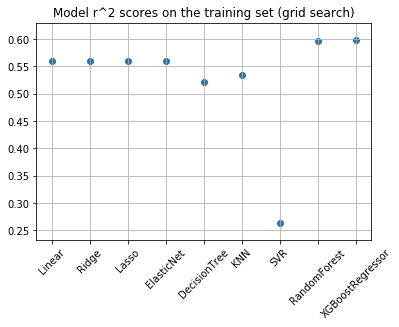

In [ ]:
''' plot best scores '''

plt.scatter(x = model, y = best_score)
plt.title('Model r^2 scores on the training set (grid search)')   
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()   


<p><a name="section 10"></a></p> 

### Section 10: Cross validation via random search                            


In [ ]:
''' define empty lists to contain results '''

model_r = []  
best_score_r = []  

In [ ]:
''' Linear regression => includes extraneous steps for consistency with other models '''  

start_time = time.time()  

# linear regression pipeline 
linear_pipe_r = Pipeline([('preprocessor', preprocessor), ('linear', LinearRegression())])     

# linear regression search parameters    
linear_params_r = { }        

# ridge grid search  
kfold = KFold(n_splits = 5, shuffle = True)  
linear_grid_r = RandomizedSearchCV(linear_pipe_r, param_distributions = linear_params_r, cv = kfold)  
linear_grid_r.fit(x_train, y_train)   

# # append values to lists 
model_r.append('Linear_r')  
best_score_r.append(linear_grid_r.best_score_)     

# print results 
print(f'The best score: {linear_grid_r.best_score_}', '\n')  
print(f'The best parameters: {linear_grid_r.best_params_}', '\n')
run_time = round((time.time() - start_time)/60, 5)  
print(f'Run time: {run_time} minutes')




The best score: 0.5602118738009436 

The best parameters: {} 

Run time: 0.00861 minutes


In [ ]:
''' Ridge '''

start_time = time.time() 

# ridge pipeline 
ridge_pipe_r = Pipeline([('preprocessor', preprocessor), ('ridge', Ridge())])     

# ridge random search parameters   
ridge_params_r = {'ridge__alpha': uniform(1e-4, 20)}    

# ridge random search 
kfold = KFold(n_splits = 5, shuffle = True)  
ridge_grid_r = RandomizedSearchCV(ridge_pipe_r, param_distributions = ridge_params_r, cv = kfold)      
ridge_grid_r.fit(x_train, y_train)   

# append values to lists 
model_r.append('Ridge_r')  
best_score_r.append(ridge_grid_r.best_score_) 

# print results 
print(f'The best score: {ridge_grid_r.best_score_}', '\n')  
print(f'The best parameters: {ridge_grid_r.best_params_}', '\n')
run_time = round((time.time() - start_time)/60, 5)  
print(f'Run time: {run_time} minutes')     



The best score: 0.5614249678534657 

The best parameters: {'ridge__alpha': 19.68092968204215} 

Run time: 0.0696 minutes


In [ ]:
''' Lasso '''

start_time = time.time()   

# lasso pipeline 
lasso_pipe_r = Pipeline([('preprocessor', preprocessor), ('lasso', Lasso())])      
              
# lasso random search parameters    
lasso_params_r = [{'lasso__alpha': uniform(1e-4, 10),   
                   'lasso__max_iter': randint(1000, 2000)}]


# lasso random search  
kfold = KFold(n_splits = 5, shuffle = True)  
lasso_grid_r = RandomizedSearchCV(lasso_pipe_r, param_distributions = lasso_params_r, cv = kfold)     
lasso_grid_r.fit(x_train, y_train)   

# append values to lists 
model_r.append('Lasso_r')  
best_score_r.append(lasso_grid_r.best_score_)   

# print results 
print(f'The best score: {lasso_grid_r.best_score_}', '\n')  
print(f'The best parameters: {lasso_grid_r.best_params_}', '\n')
run_time = round((time.time() - start_time)/60, 5)  
print(f'Run time: {run_time} minutes')




The best score: 0.5606946929738142 

The best parameters: {'lasso__alpha': 3.71467216719488, 'lasso__max_iter': 1289} 

Run time: 0.08017 minutes


In [ ]:
''' Elastic net '''    

start_time = time.time()  

# elastic net pipeline 
elastic_pipe_r = Pipeline([('preprocessor', preprocessor), ('elastic', ElasticNet())])      
              
# elastic net random search parameters    
elastic_params_r = {'elastic__alpha': uniform(1e-4, 3), 
                    'elastic__l1_ratio': uniform(0.25, 0.99),   
                    'elastic__max_iter': randint(1000, 3000)  }     

# elastic net random search   
kfold = KFold(n_splits = 5, shuffle = True)  
elastic_grid_r = RandomizedSearchCV(elastic_pipe_r, param_distributions = elastic_params_r, cv = kfold)    
elastic_grid_r.fit(x_train, y_train)   

# append values to lists 
model_r.append('ElasticNet')  
best_score_r.append(elastic_grid_r.best_score_) 

# print results 
print(f'The best score: {elastic_grid_r.best_score_}', '\n')  
print(f'The best parameters: {elastic_grid_r.best_params_}', '\n')
run_time = round((time.time() - start_time)/60, 5)  
print(f'Run time: {run_time} minutes')




The best score: 0.5391606292025555 

The best parameters: {'elastic__alpha': 1.306086779761979, 'elastic__l1_ratio': 0.9310924376810905, 'elastic__max_iter': 1751} 

Run time: 0.1514 minutes


In [ ]:
''' Decision tree regressor '''   

start_time = time.time()  

# decision tree pipeline 
decision_pipe_r = Pipeline([('preprocessor', preprocessor), ('decision', DecisionTreeRegressor())])  

# decision tree random search parameters     
decision_params_r = {#'decision__criterion': ['gini', 'entropy'],  
                     'decision__criterion': ['mse'],   
                     'decision__min_samples_leaf': randint(1, 10), 
                     'decision__min_samples_split': randint(2, 30) }  

# decision tree random search   
kfold = KFold(n_splits = 5, shuffle = True) 
decision_grid_r = RandomizedSearchCV(decision_pipe_r, param_distributions = decision_params_r, cv = kfold)     
decision_grid_r.fit(x_train, y_train)   

# append values to lists 
model_r.append('DecisionTree')  
best_score_r.append(decision_grid_r.best_score_)  

# print results 
print(f'The best score: {decision_grid_r.best_score_}', '\n')  
print(f'The best parameters: {decision_grid_r.best_params_}', '\n')
run_time = round((time.time() - start_time)/60, 5)  
print(f'Run time: {run_time} minutes')



The best score: 0.4885018088610732 

The best parameters: {'decision__criterion': 'mse', 'decision__min_samples_leaf': 9, 'decision__min_samples_split': 16} 

Run time: 0.07718 minutes


In [ ]:
''' KNN regressor '''    

start_time = time.time()  

# KNeighbors pipeline 
knn_pipe_r = Pipeline([('preprocessor', preprocessor), ('knn', KNeighborsRegressor())])  

# decision tree parameters for grid search 
knn_params_r = {'knn__n_neighbors': randint(1, 10),  
                'knn__algorithm': ['brute', 'auto'],   
                'knn__p': randint(1, 5) }  

# knn random search   
kfold = KFold(n_splits = 5, shuffle = True) 
knn_grid_r = RandomizedSearchCV(knn_pipe_r, param_distributions = knn_params_r, cv = kfold)    
knn_grid_r.fit(x_train, y_train)   

# append values to lists 
model_r.append('KNN')  
best_score_r.append(knn_grid_r.best_score_)  

# print results 
print(f'The best score: {knn_grid_r.best_score_}', '\n')  
print(f'The best parameters: {knn_grid_r.best_params_}', '\n')
run_time = round((time.time() - start_time)/60, 5)  
print(f'Run time: {run_time} minutes')



The best score: 0.5078019625780409 

The best parameters: {'knn__algorithm': 'auto', 'knn__n_neighbors': 7, 'knn__p': 1} 

Run time: 0.52985 minutes


In [ ]:
''' SVR '''     

start_time = time.time()  

# svr pipeline 
svr_pipe_r = Pipeline([('preprocessor', preprocessor), ('svr', SVR())])   

# svr parameters for grid search 
svr_params_r = {'svr__kernel': ['linear', 'poly', 'rbf'],  # default = rbf
                'svr__C': uniform(0.1, 10),   # default = 1.0    
                'svr__gamma': uniform(1e-3, 1) } #np.linspace(1e-3, 1, 10) }  # default = scale

# svr grid search 
kfold = KFold(n_splits = 5, shuffle = True) 
svr_grid_r = RandomizedSearchCV(svr_pipe_r, param_distributions = svr_params, cv = kfold)    
svr_grid_r.fit(x_train, y_train)   

# append values to lists 
model_r.append('SVR')  
best_score_r.append(svr_grid_r.best_score_)  

# print results 
print(f'The best score: {svr_grid_r.best_score_}', '\n')  
print(f'The best parameters: {svr_grid_r.best_params_}', '\n')
run_time = round((time.time() - start_time)/60, 5)  
print(f'Run time: {run_time} minutes')



The best score: 0.26435031778402757 

The best parameters: {'svr__kernel': 'rbf', 'svr__gamma': 'scale', 'svr__C': 5} 

Run time: 0.62418 minutes


In [ ]:
''' Random Forest Regressor '''     

start_time = time.time()  

# random forest pipeline 
randomf_pipe_r = Pipeline([('preprocessor', preprocessor), ('randomf', RandomForestRegressor())])   

# random forest grid search 
randomf_params_r = [{'randomf__n_estimators': randint(25, 225), 
                     'randomf__max_depth': randint(1, 11), 
                     'randomf__min_samples_leaf': randint(1, 11), 
                     'randomf__min_samples_split': randint(2, 12)  }]


# random forest random search 
kfold = KFold(n_splits = 5, shuffle = True) 
randomf_grid_r = RandomizedSearchCV(randomf_pipe_r, param_distributions = randomf_params_r, cv = kfold)      
randomf_grid_r.fit(x_train, y_train)   

# append values to lists 
model_r.append('RandomForest_r')  
best_score_r.append(randomf_grid_r.best_score_)  

# print results 
print(f'The best score: {randomf_grid_r.best_score_}', '\n')  
print(f'The best parameters: {randomf_grid_r.best_params_}', '\n')
run_time = round((time.time() - start_time)/60, 5)  
print(f'Run time: {run_time} minutes')




The best score: 0.5970104284186301 

The best parameters: {'randomf__max_depth': 6, 'randomf__min_samples_leaf': 4, 'randomf__min_samples_split': 3, 'randomf__n_estimators': 70} 

Run time: 0.88414 minutes


In [ ]:
''' Gradient Boosting Regressor '''    

# start_time = time.time()  

# # gradient boosting regressor pipeline 
# gbr_pipe_r = Pipeline([('preprocessor', preprocessor), ('gbr', GradientBoostingRegressor())])   

# # gbr parameters for grid search 
# gbr_params_r = {'gbr__n_estimators': randint(100, 500), # default = 100; # unlike tree models, this is how many iteration rounds you'd like to run (default = 100) 
#               'bgr__learning_rate': uniform(0.01, 0.75), # default = 0.1 
#               'gbr__subsample': uniform(0.25, 1.0),  # 
#               'gbr__max_depth': randint(3, 50) }  # default = 3  

# # svr random search 
# kfold = KFold(n_splits = 5, shuffle = True) 
# gbr_grid_r = RandomizedSearchCV(gbr_pipe_r, param_distributions = gbr_params_r, cv = kfold)     
# gbr_grid_r.fit(x_train, y_train)   

# # append values to lists 
# model.append('GradientBoosting_r')  
# best_score.append(gbr_grid_r.best_score_)  

# # print results 
# print(f'The best score: {gbr_grid_r.best_score_}', '\n')  
# print(f'The best parameters: {gbr_grid_r.best_params_}', '\n')
# run_time = round((time.time() - start_time)/60, 5)  
# print(f'Run time: {run_time} minutes')



' Gradient Boosting Regressor '

In [ ]:
''' XGBoost Regressor '''    

start_time = time.time()  

# gradient boosting regressor pipeline 
xgb_pipe_r = Pipeline([('preprocessor', preprocessor), ('xgb', GradientBoostingRegressor())])   

# xgb parameters for grid search 
xgb_params_r = {'xgb__n_estimators': randint(100, 900), # default = 100
                'xgb__learning_rate': uniform(0.01, 0.75), # default = 0.1 
                'xgb__subsample': uniform(0.25, 1),  # default = 1.0   
                'xgb__max_depth': randint(3, 50) } # default = 3

# xgb random search 
kfold = KFold(n_splits = 5, shuffle = True) 
xgb_grid_r = RandomizedSearchCV(xgb_pipe_r, param_distributions = xgb_params_r, cv = kfold)     
xgb_grid_r.fit(x_train, y_train)   

# append values to lists 
model_r.append('XGBoostRegressor_r')  
best_score_r.append(xgb_grid_r.best_score_)  

# print results 
print(f'The best score: {xgb_grid_r.best_score_}', '\n')  
print(f'The best parameters: {xgb_grid_r.best_params_}', '\n')
run_time = round((time.time() - start_time)/60, 5)  
print(f'Run time: {run_time} minutes')



The best score: 0.5058661162116465 

The best parameters: {'xgb__learning_rate': 0.019147850324680242, 'xgb__max_depth': 22, 'xgb__n_estimators': 327, 'xgb__subsample': 0.6860273662759242} 

Run time: 4.00293 minutes


<p><a name="section 11"></a></p> 

### Section 11: Display random search results                          


In [ ]:
''' print the model list '''

model_r     

['Linear_r',
 'Ridge_r',
 'Lasso_r',
 'ElasticNet',
 'DecisionTree',
 'KNN',
 'SVR',
 'RandomForest_r',
 'XGBoostRegressor_r']

In [ ]:
''' print best scores (r^2) '''

for i in range(len(model_r)):  
    print(f'The r^2 score for {model_r[i]} is: {best_score_r[i]:.5f}', '\n') 

The r^2 score for Linear_r is: 0.56021 

The r^2 score for Ridge_r is: 0.56142 

The r^2 score for Lasso_r is: 0.56069 

The r^2 score for ElasticNet is: 0.53916 

The r^2 score for DecisionTree is: 0.48850 

The r^2 score for KNN is: 0.50780 

The r^2 score for SVR is: 0.26435 

The r^2 score for RandomForest_r is: 0.59701 

The r^2 score for XGBoostRegressor_r is: 0.50587 



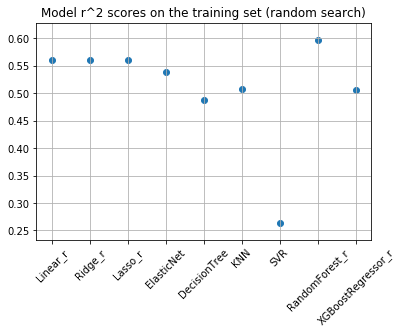

In [ ]:
''' plot best scores '''

plt.scatter(x = model_r, y = best_score_r)
plt.title('Model r^2 scores on the training set (random search)')   
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()   


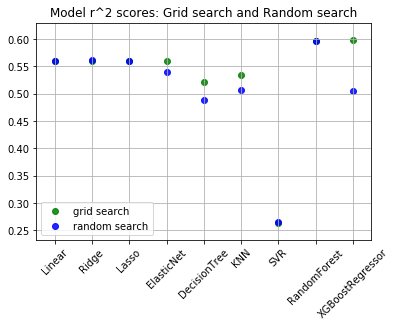

In [ ]:
''' plot best scores: grid search and random search '''

plt.scatter(x = model, y = best_score, c = 'g', alpha = 0.85, label = 'grid search')
plt.scatter(x = model, y = best_score_r, c = 'b', alpha = 0.85, label = 'random search')
plt.title('Model r^2 scores: Grid search and Random search')   
plt.grid(True)   
plt.xticks(rotation = 45)   
plt.legend(loc = 'best')
plt.show()   


<p><a name="section 12"></a></p> 

### Section 12: Pickle files                           


In [ ]:
''' pickle the df => models can be similarly pickled '''

#pickle.dump(df, open('bigMart.dat', 'wb'))  # data frame saved as bigMart.dat; 'wb' = write bytes



In [ ]:
''' unpickle the df => models can be similarly unpickled '''

#df = pickle.load(open('bigMart.dat', 'rb'))   # 'rb' = read bytes



In [ ]:
''' check '''

#df.sample(10)

#df.shape  

